In [ ]:
import numpy as np 
import earthpy.plot as ep
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import imageio
import matplotlib
from matplotlib.colors import ListedColormap
from skimage.io import imsave
import dataset_corine

In [ ]:
train_images_dir = '...'
train_labels_dir = '...'

In [3]:
data = dataset_corine.DatasetCorine(train_images_dir, train_labels_dir)

In [ ]:
def imshow_corine_label(data):
    # https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar
    # Color mapping:
    col_dict={0:[1.0,1.0,1.0,1.0],
              1:[210.0/255.0,0.0/255.0,0.0/255.0,255.0/255.0],
              2:[253/255.0,211/255.0,39/255.0,255/255.0],
              3:[176/255.0,91/255.0,16/255.0,255/255.0],
              4: [35/255.0,152/255.0,0/255.0,255/255.0],
              5:[8/255.0,98/255.0,0/255.0,255/255.0],
              6:[249/255.0,150/255.0,39/255.0,255/255.0],
              7:[141/255.0,139/255.0,0/255.0,255/255.0],
              8:[95/255.0,53/255.0,6/255.0,255/255.0],
              9:[149/255.0,107/255.0,196/255.0,255/255.0],
              10:[77/255.0,37/255.0,106/255.0,255/255.0],
              11:[154/255.0,154/255.0,154/255.0,255/255.0],
              12:[106/255.0,255/255.0,255/255.0,255/255.0],
              13:[20/255.0,69/255.0,249/255.0,255/255.0],
              14:[20/255.0,69/255.0,249/255.0,10/255.0]
             }

    cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

    labels = np.array(["Clouds","Artificial surfaces and constructions","Cultivated areas",
                       "Vineyards","Broadleaf tree cover",
                      "Coniferous tree cover","Herbaceous vegetation",
                      "Moors and Heathland","Sclerophyllous vegetation",
                     "Marshes","Peatbogs","Natural material surfaces",
                      "Permanent snow covered surfaces",
                      "Water bodies",
                       "No data"
                      ])
    len_lab = len(labels)

    # prepare normalizer
    ## Prepare bins for the normalizer
    norm_bins = np.sort([*col_dict.keys()]) + 0.5
    norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
    # print(norm_bins)
    ## Make normalizer and formatter
    norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
    fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

    # Plot our figure
    fig,ax = plt.subplots(figsize=(20,20))
    im = ax.imshow(data, cmap=cm, norm=norm)

    diff = norm_bins[1:] - norm_bins[:-1]
    tickz = norm_bins[:-1] + diff / 2
    cb = fig.colorbar(im, format=fmt, ticks=tickz)
    
    plt.show()

In [5]:
def unnormalize(dictionary):
    image = dictionary['img']
    mean = dictionary['mean']
    std = dictionary['std']
    image = image.numpy();
    std_expanded = np.expand_dims(np.expand_dims(std, -1), -1)
    mean_expanded = np.expand_dims(np.expand_dims(mean, -1), -1)
    img_un = (image * std_expanded + mean_expanded) * ((2**16)-1)
    img_un = np.clip(img_un, 0, (2**16)-1).astype(np.uint16)
    return img_un

In [11]:
def visualize(dictionary):
    image = unnormalize(dictionary) #imatge (4, 512, 512)
    
    # Color mapping:
    col_dict={0:[1.0,1.0,1.0,1.0],
              1:[210.0/255.0,0.0/255.0,0.0/255.0,255.0/255.0],
              2:[253/255.0,211/255.0,39/255.0,255/255.0],
              3:[176/255.0,91/255.0,16/255.0,255/255.0],
              4: [35/255.0,152/255.0,0/255.0,255/255.0],
              5:[8/255.0,98/255.0,0/255.0,255/255.0],
              6:[249/255.0,150/255.0,39/255.0,255/255.0],
              7:[141/255.0,139/255.0,0/255.0,255/255.0],
              8:[95/255.0,53/255.0,6/255.0,255/255.0],
              9:[149/255.0,107/255.0,196/255.0,255/255.0],
              10:[77/255.0,37/255.0,106/255.0,255/255.0],
              11:[154/255.0,154/255.0,154/255.0,255/255.0],
              12:[106/255.0,255/255.0,255/255.0,255/255.0],
              13:[20/255.0,69/255.0,249/255.0,255/255.0],
              14:[20/255.0,69/255.0,249/255.0,10/255.0]
             }

    # We create a colormar from our list of colors
    cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

    # Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
    labels = np.array(["Clouds","Artificial surfaces and constructions","Cultivated areas",
                       "Vineyards","Broadleaf tree cover",
                      "Coniferous tree cover","Herbaceous vegetation",
                      "Moors and Heathland","Sclerophyllous vegetation",
                     "Marshes","Peatbogs","Natural material surfaces",
                      "Permanent snow covered surfaces",
                      "Water bodies",
                       "No data"
                      ])
    
    len_lab = len(labels)

    norm_bins = np.sort([*col_dict.keys()]) + 0.5
    norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
    
    norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
    fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])
    

    diff = norm_bins[1:] - norm_bins[:-1]
    tickz = norm_bins[:-1] + diff / 2
    
    
    fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2,figsize=(16,8))  

    ep.plot_rgb(image,rgb=(2,1,0),stretch=True,ax=ax1)
    
    im = ax2.imshow(dictionary['label'], cmap=cm, norm=norm)
    
    #cb = fig.colorbar(im, format=fmt, ticks=tickz)
    
    plt.show()

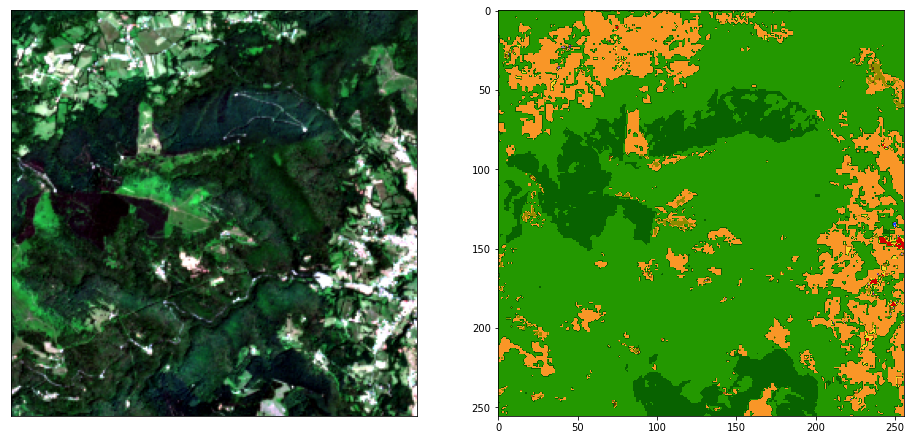

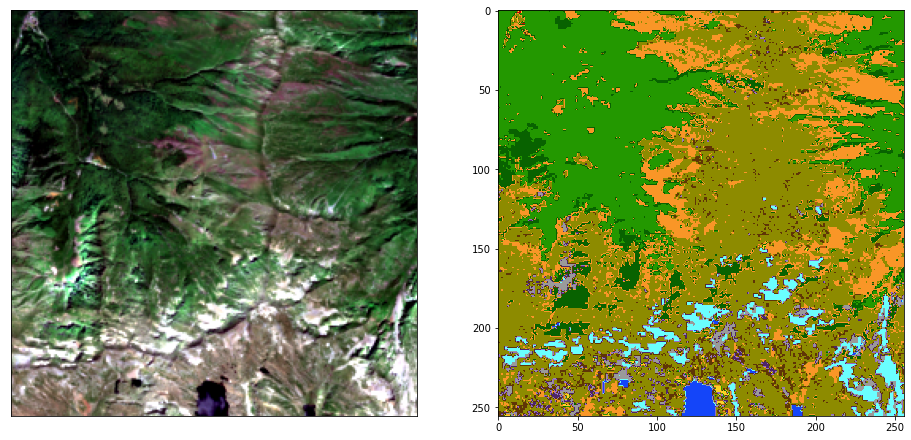

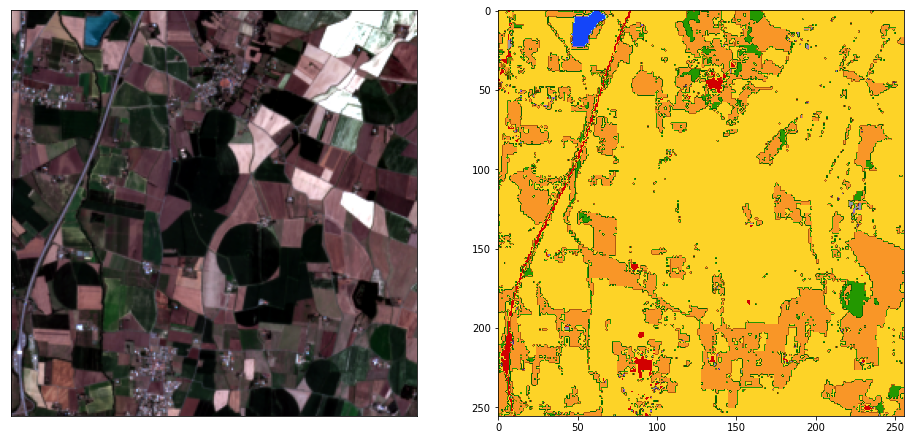

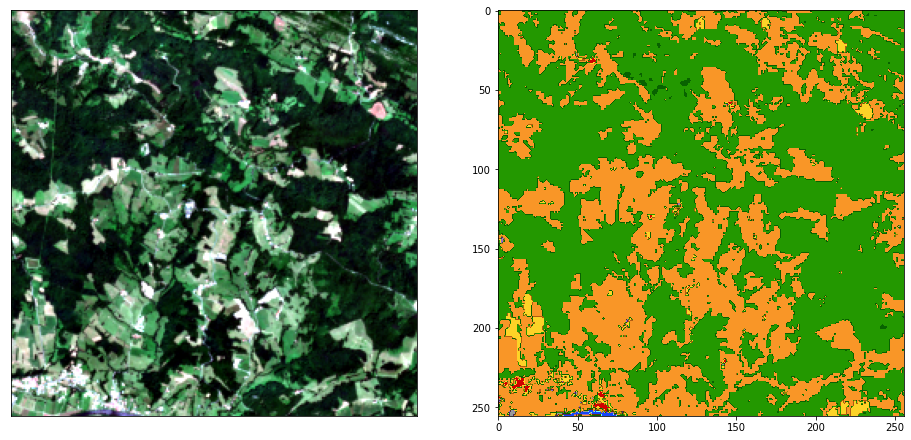

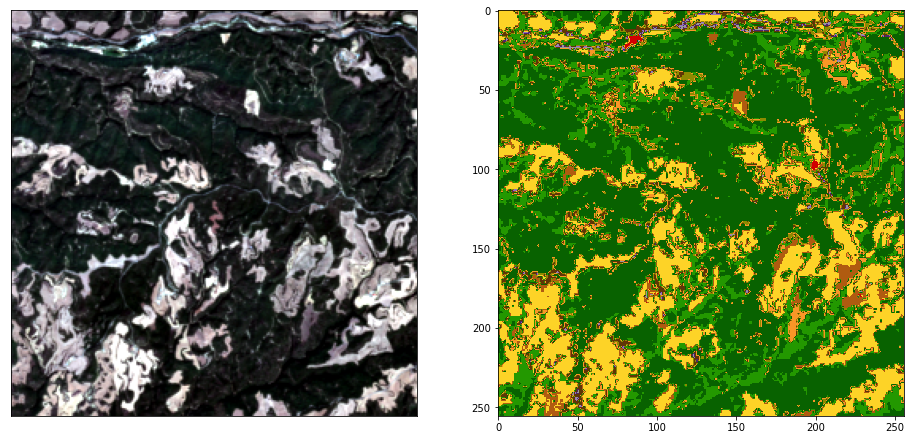

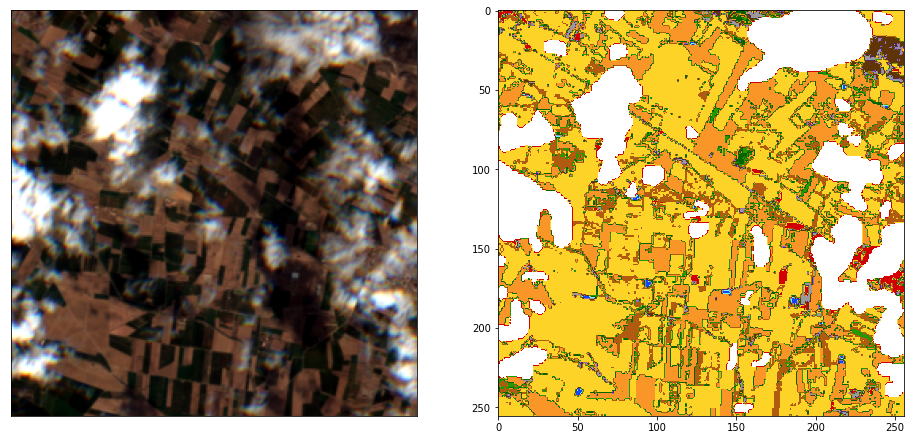

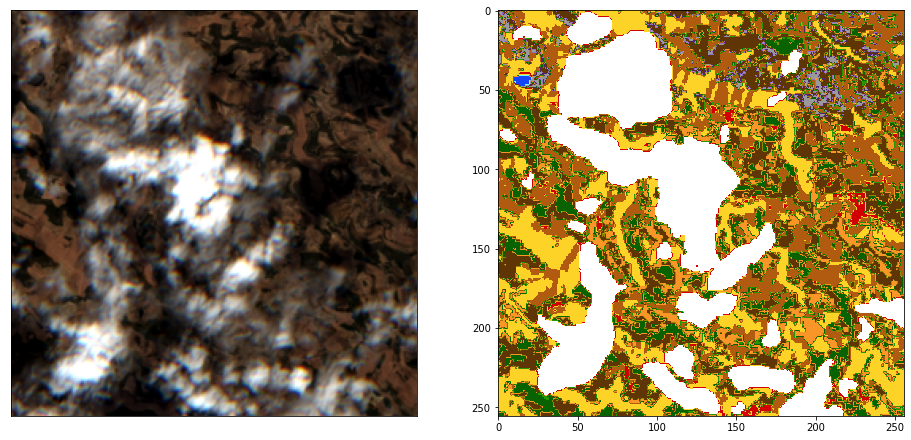

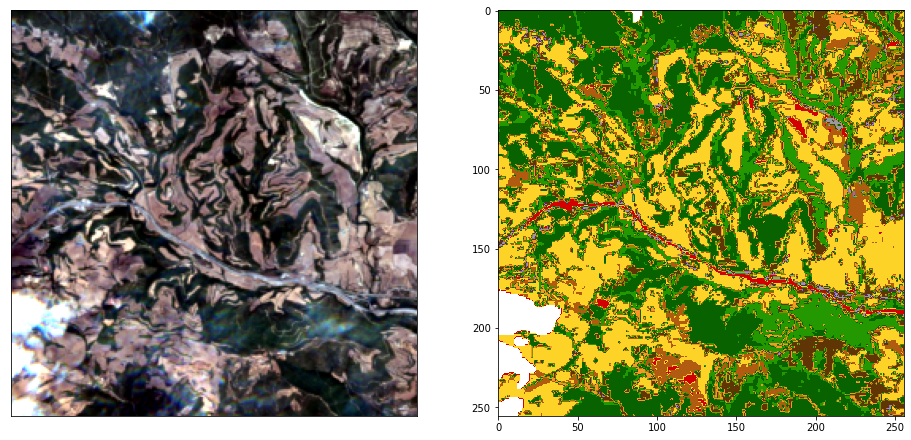

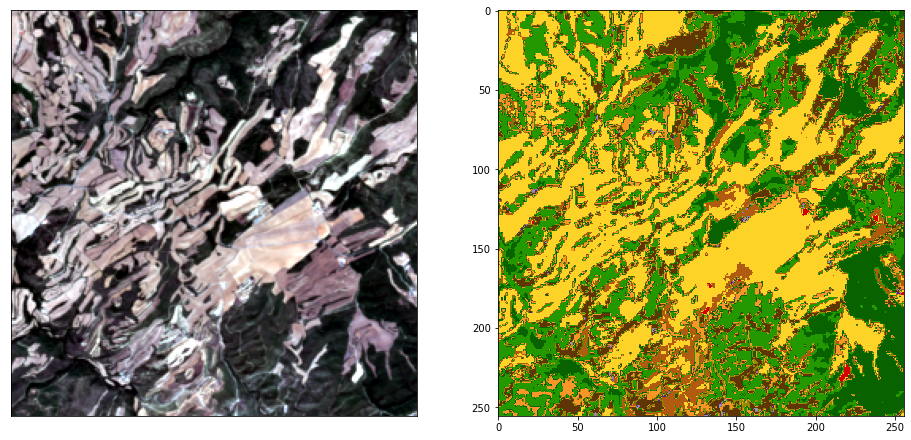

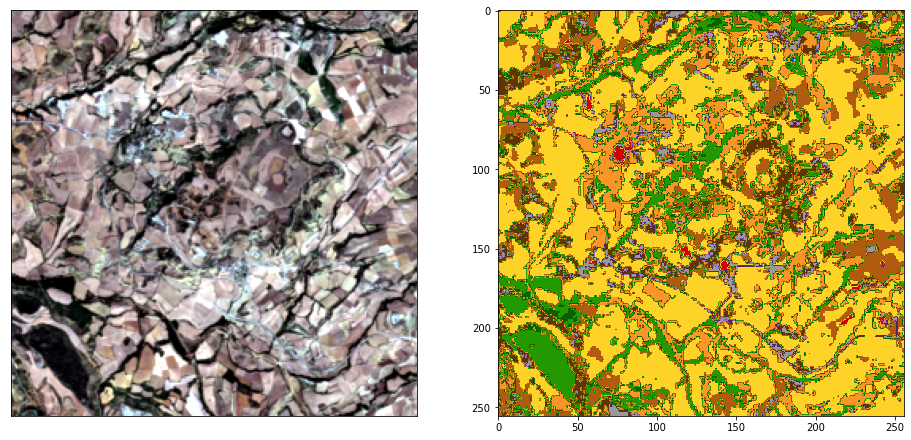

In [18]:
for i in range(240, 250):  
    visualize(data[i])